In [25]:
import torch
from torch import nn
from torch.nn import functional as F

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
from tabulate import tabulate

from trainer import Trainer, generate_data_iter
import utils
import cam

def plot_test_pic(cam_img, insertion, deletion):
    fig = plt.figure(figsize = (13, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cam_img)
    plt.title('CAM Image')
    plt.axis('off')
    
    x_axis = np.linspace(0, 1, len(insertion))
    plt.subplot(1, 3, 2)
    plt.plot(x_axis, insertion)
    plt.title('Insertion Curve')
    plt.fill_between(x_axis, 0, insertion, alpha=0.4)
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])
    
    plt.subplot(1, 3, 3)
    plt.plot(x_axis, deletion)
    plt.title('Deletion Curve')
    plt.fill_between(x_axis, 0, deletion, alpha=0.4)
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])

In [26]:
model_mode, dataset, seed, cuda = 'resnet18', 'FashionMNIST', 2, 1
target_layer = 'layer4' if model_mode == 'resnet18' else 'blocks'
fig_num = 100
metrics = {}

utils.set_random_seed(seed)
trainer = Trainer(
    model_mode = model_mode,
    dataset = dataset,
    bs = 128,
    lr = 0.01,
    seed = seed,
    cuda = cuda,
    use_lr_sche = True,
    use_wandb = False,
)
trainer.load()
# top1_acc, top5_acc = trainer.evaluate_model()
# print(f'Seed: {seed}    Top 1 Acc: {top1_acc * 100:4.2f}%    Top 5 Acc: {top5_acc * 100:4.2f}%')

test_iter = generate_data_iter(dataset, batch_size = fig_num, mode = 'test')
imgs, labels = next(iter(test_iter))

df_pth = f'./thesis/cam_metrics/{dataset}/'
if not os.path.exists(df_pth):
    os.makedirs(df_pth)
    
cam_np_pth = f'thesis/cam_pics/{dataset}/'
if not os.path.exists(cam_np_pth):
    os.makedirs(cam_np_pth)

### CAM

| Average Incr | 0.23      |
| Average Drop | 0.0742636 |
| Insertion    | 0.572868  |
| Deletion     | 0.367533  |
CAM, Pred: 5, Label: 5, Prob: 100.00%


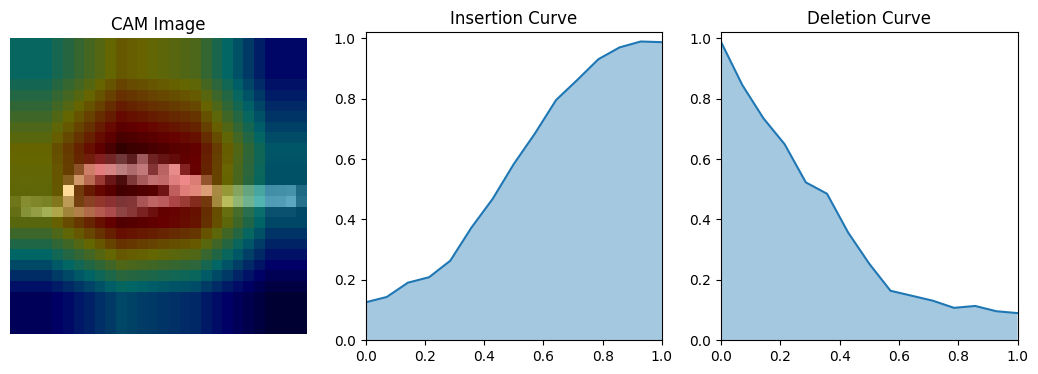

In [27]:
if model_mode == 'resnet18':
    mycam = cam.CAM(trainer.model, dataset, target_layer, 'fc', cuda = cuda)
    cam_name = mycam.__class__.__name__
    cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
    metrics[mycam.__class__.__name__] = {
        'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
        'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
    }
    np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
    print(tabulate(
        list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
    ))
    
    idx = 8
    print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
    plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### Grad-CAM

| Average Incr | 0.23      |
| Average Drop | 0.0742636 |
| Insertion    | 0.572868  |
| Deletion     | 0.367533  |
GradCAM, Pred: 5, Label: 5, Prob: 100.00%


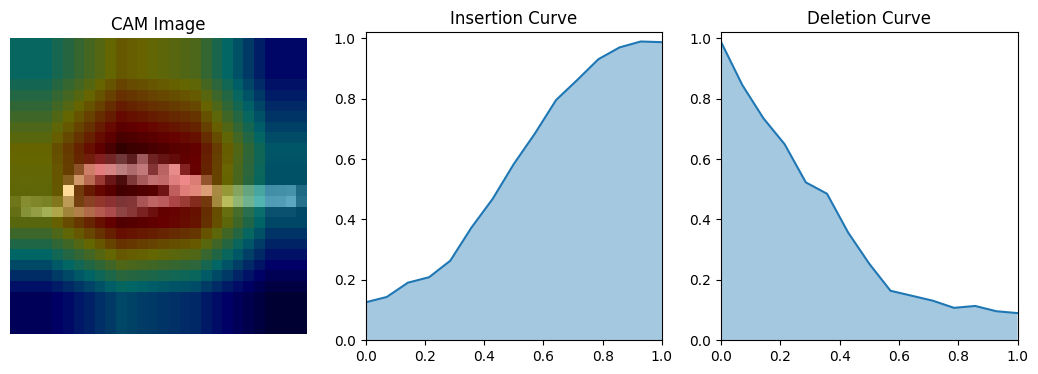

In [28]:
mycam = cam.GradCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### Grad-CAM++

| Average Incr | 0.2       |
| Average Drop | 0.0885816 |
| Insertion    | 0.560903  |
| Deletion     | 0.362457  |
GradCAMpp, Pred: 5, Label: 5, Prob: 100.00%


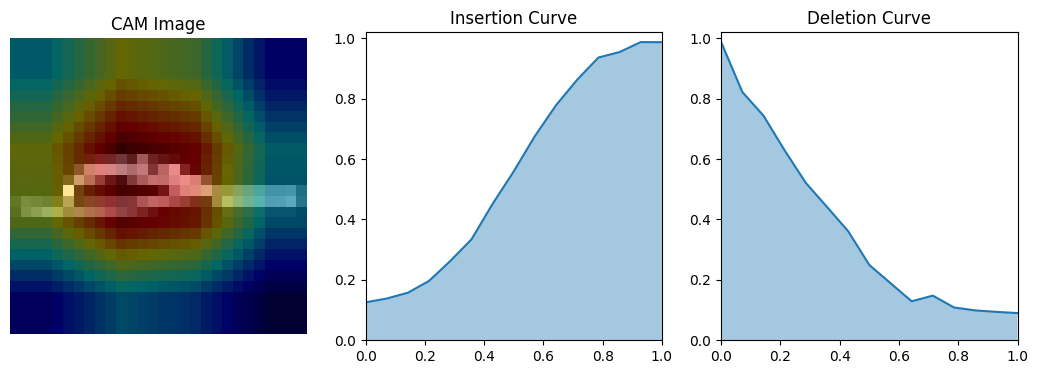

In [29]:
mycam = cam.GradCAMpp(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### Smooth Grad-CAM++

| Average Incr | 0.16      |
| Average Drop | 0.0970593 |
| Insertion    | 0.55571   |
| Deletion     | 0.371816  |
SMGradCAMpp, Pred: 5, Label: 5, Prob: 100.00%


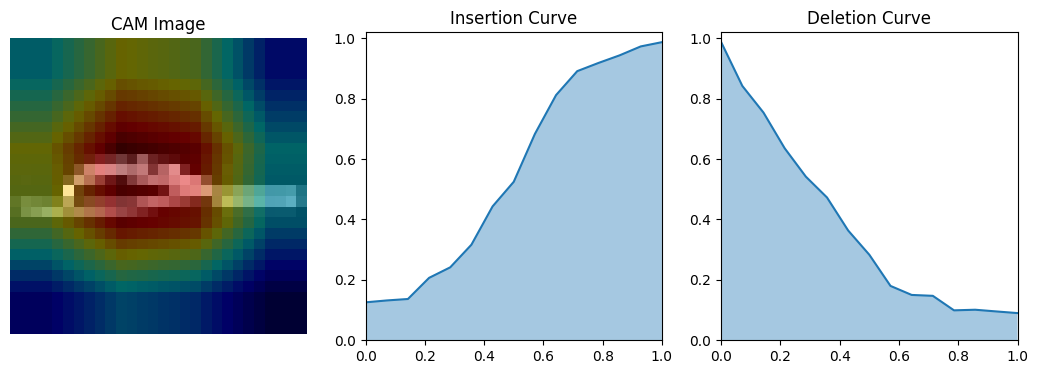

In [30]:
mycam = cam.SMGradCAMpp(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### LayerCAM

| Average Incr | 0.2       |
| Average Drop | 0.0869122 |
| Insertion    | 0.561803  |
| Deletion     | 0.360976  |
LayerCAM, Pred: 5, Label: 5, Prob: 100.00%


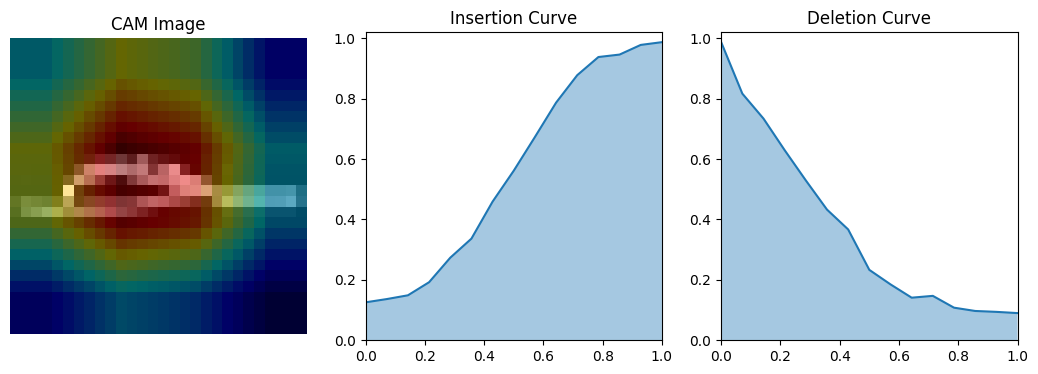

In [31]:
mycam = cam.LayerCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### XGrad-CAM

| Average Incr | 0.23      |
| Average Drop | 0.0743054 |
| Insertion    | 0.572843  |
| Deletion     | 0.367533  |
XGradCAM, Pred: 5, Label: 5, Prob: 100.00%


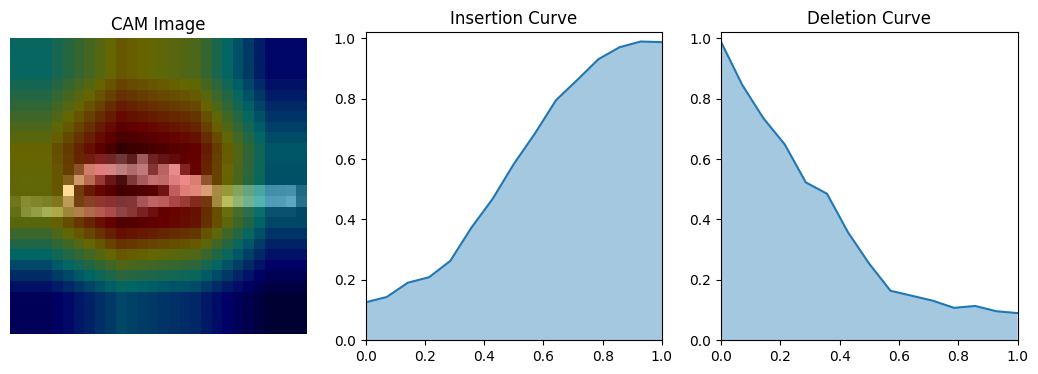

In [32]:
mycam = cam.XGradCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### Score-CAM

| Average Incr | 0.33       |
| Average Drop | 0.00137407 |
| Insertion    | 0.590958   |
| Deletion     | 0.371058   |
ScoreCAM, Pred: 5, Label: 5, Prob: 100.00%


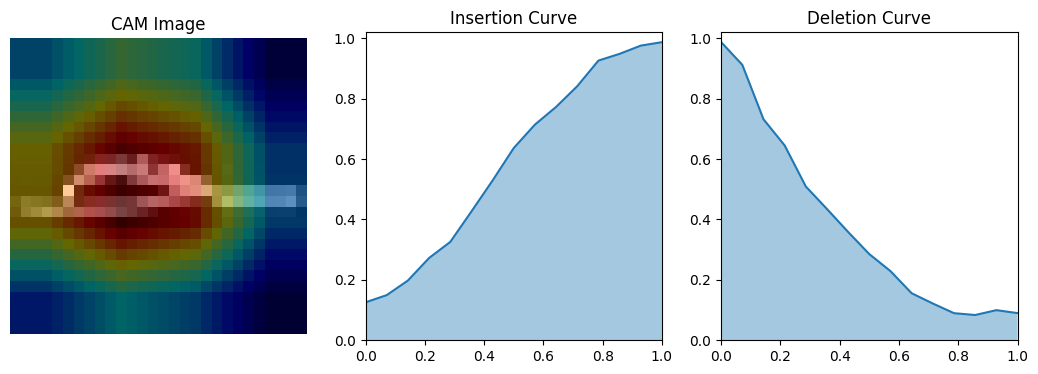

In [33]:
mycam = cam.ScoreCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### SS-CAM

| Average Incr | 0.11     |
| Average Drop | 0.110901 |
| Insertion    | 0.54562  |
| Deletion     | 0.36401  |
SSCAM, Pred: 5, Label: 5, Prob: 100.00%


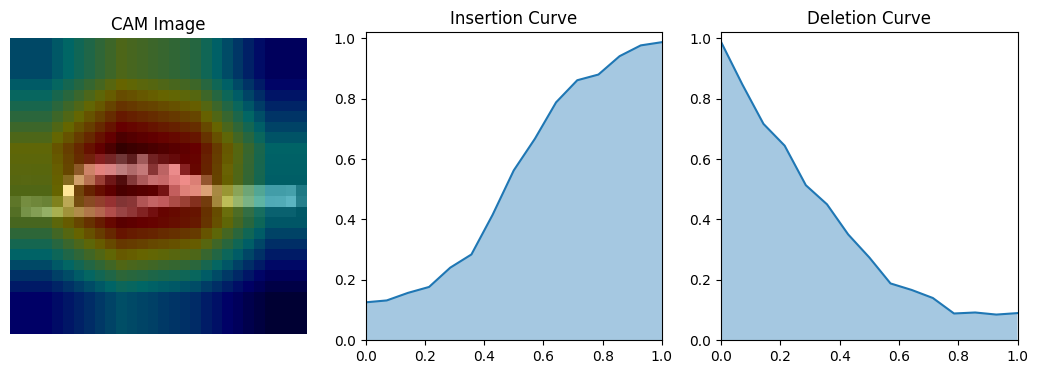

In [34]:
mycam = cam.SSCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### IS-CAM

| Average Incr | 0.25      |
| Average Drop | 0.0252319 |
| Insertion    | 0.580861  |
| Deletion     | 0.372557  |
ISCAM, Pred: 5, Label: 5, Prob: 100.00%


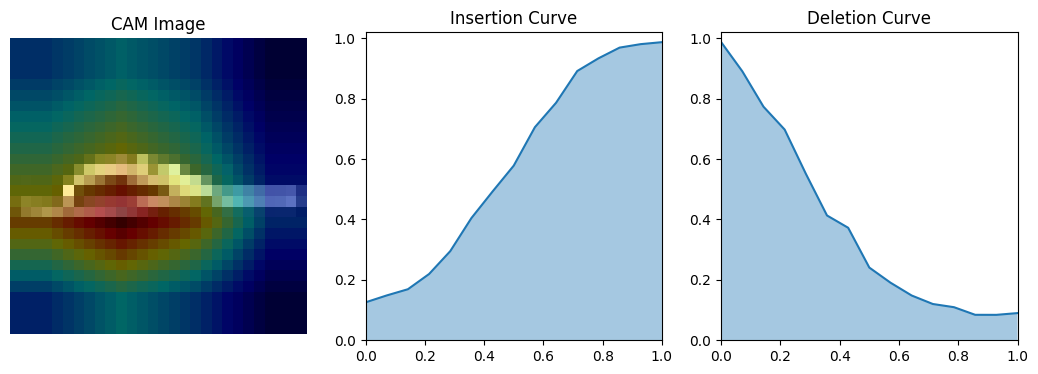

In [35]:
mycam = cam.ISCAM(trainer.model, dataset, target_layer, cuda = cuda)
cam_name = mycam.__class__.__name__
cam_imgs, preds, probs, metrics_cam = mycam(imgs, metric = True)
metrics[cam_name] = {
    'Average Incr': metrics_cam['Average Incr'], 'Average Drop': metrics_cam['Average Drop'],
    'Insertion':  metrics_cam['Insertion'], 'Deletion': metrics_cam['Deletion'],
}
np.save(cam_np_pth + f'{cam_name}-{dataset}-{model_mode}-seed{seed}.npy', cam_imgs)
print(tabulate(
    list(metrics[mycam.__class__.__name__].items()), tablefmt ='orgtbl'
))
    
idx = 8
print(f'{cam_name}, Pred: {preds[idx]}, Label: {labels[idx]}, Prob: {probs[idx]*100:4.2f}%')
plot_test_pic(cam_imgs[idx], metrics_cam['inse_score'], metrics_cam['dele_score'])

### Metrics

In [36]:
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(df_pth + f'CAM-{model_mode}-{dataset}-seed{seed}.csv')
metrics_df

,CAM,GradCAM,GradCAMpp,SMGradCAMpp,LayerCAM,XGradCAM,ScoreCAM,SSCAM,ISCAM
Average Incr,0.230000,0.230000,0.200000,0.160000,0.200000,0.230000,0.330000,0.110000,0.250000
Average Drop,0.074264,0.074264,0.088582,0.097059,0.086912,0.074305,0.001374,0.110901,0.025232
Insertion,0.572868,0.572868,0.560903,0.555710,0.561803,0.572843,0.590958,0.545620,0.580861
Deletion,0.367533,0.367533,0.362457,0.371816,0.360976,0.367533,0.371058,0.364010,0.372557
